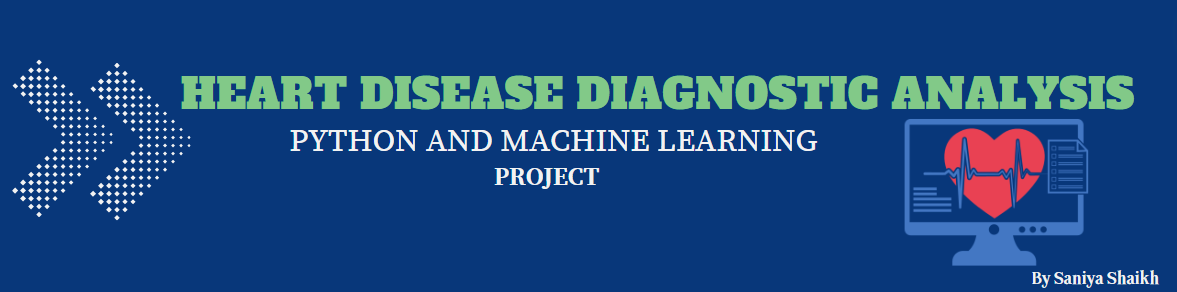

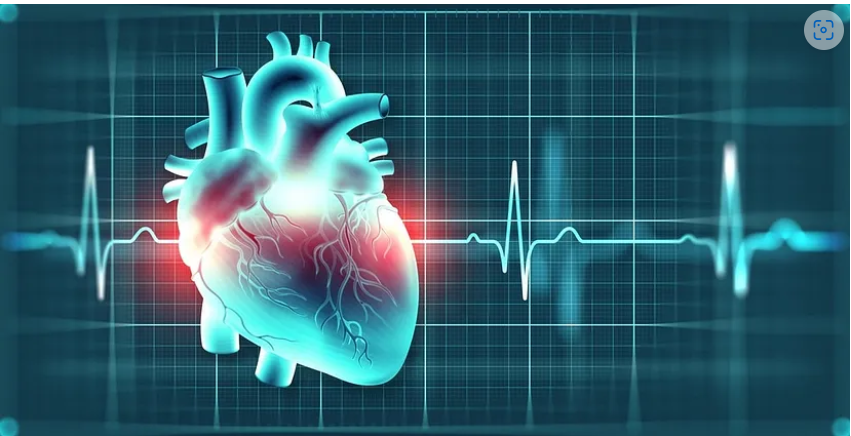

### Project Overview 

The goal of this project is to analyze the dataset of patients with heart disease and predict the likelihood of having a heart attack based on various factors. The dataset will be loaded, cleaned, preprocessed and then fed into machine learning model to make predictions.

### Objective

The main objective of this research is to develop a heart prediction system.The system can discover and extract hidden knowledge associated with diseases from a historical heart data set. Heart disease prediction system aims to exploit data mining techniques on medical data sets to assist in the prediction of heart diseases.

SPECIFIC OBJECTIVE:- Provides a new approach to concealed patterns in the data. Helps avoid human biases.To implement Logistic Regression that classifies the disease as per the input of the user.Reduce the cost of medical tests.

### Import Libraries

In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

### Data Collection - Load the Dataset

In [10]:
df = pd.read_csv('Heart Disease data.csv')

### View The Dataset - Top 5 Rows of the Dataset

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Display Last 5 Rows of the Dataset

In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### To Find Shape of Dataset (Number of Rows & Number of Columns)

In [16]:
df.shape

(1025, 14)

In [17]:
print('Number of Rows',df.shape[0])
print('Number of Columns',df.shape[1])

Number of Rows 1025
Number of Columns 14


### Dataset Information 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


* Info Details : Total number of Rows, Total Number of Columns,
 Column  Names, Datatypes of each columns & memory usage

## Data Preprocessing

### Check For Missing Values in Dataset

In [23]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* There are no missing values in the dataset

### Check For Duplicate data and drop them

In [26]:
df_dup = df.duplicated().any()
print(df_dup)

True


* True Indicates there are duplicate entries

* Drop Duplicate Entries in the Dataset

In [28]:
df = df.drop_duplicates()

In [29]:
df.shape

(302, 14)

* After dropping the duplicates 

* Number of rows = 302
* Number of columns = 14

### Reinitializing / Resetting Index

In [32]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


* Arranging the index numbers in order

In [34]:
df.index = range(0,302)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


### All Columns in the Dataset

In [36]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Dataset Features Description
### There are 14 features in Dataset
* Age : The person's age in years
* Sex : The person's gender (1 = Male, 0 = Female)
* cp  : Chest Pain Type (It has 4 values)
  Value 0 - typical angina
  Value 1 - atypical angina
  Value 2 - non-anginal pain
  Value 3 - asymptomatic
* trestbps : The person's resting blood pressure (mm Hg on admission to the hospital)
* chol : The person's serum cholestrol measurement in mg/dl
* fbs : The person's fasting blood sugar (> 120 mg/dl, 1 = True, 0 = False)
* restecg : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach : The person's maximum heart rate achieved
* exang : Exercise induced angina (1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)* 
 ca: The number of major vessels (0- colored by fluoroscopy
* thal : A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target : Heart Disease
  (0 = Less chance of Heart Attack) (1 = More chance of Heart Attack)

### To Get Overall Statistical Measures about the Data

In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* By default describe method displays statistics for all numerical columns. Count of each columns, mean value, Standard deviation, Minimum value, Maximum value and percentile(25%,50%,75%)

### Draw the correlation Matrix

In [42]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


#### Visualizing the correlation matrix

* To check correlation between different features available in the dataset

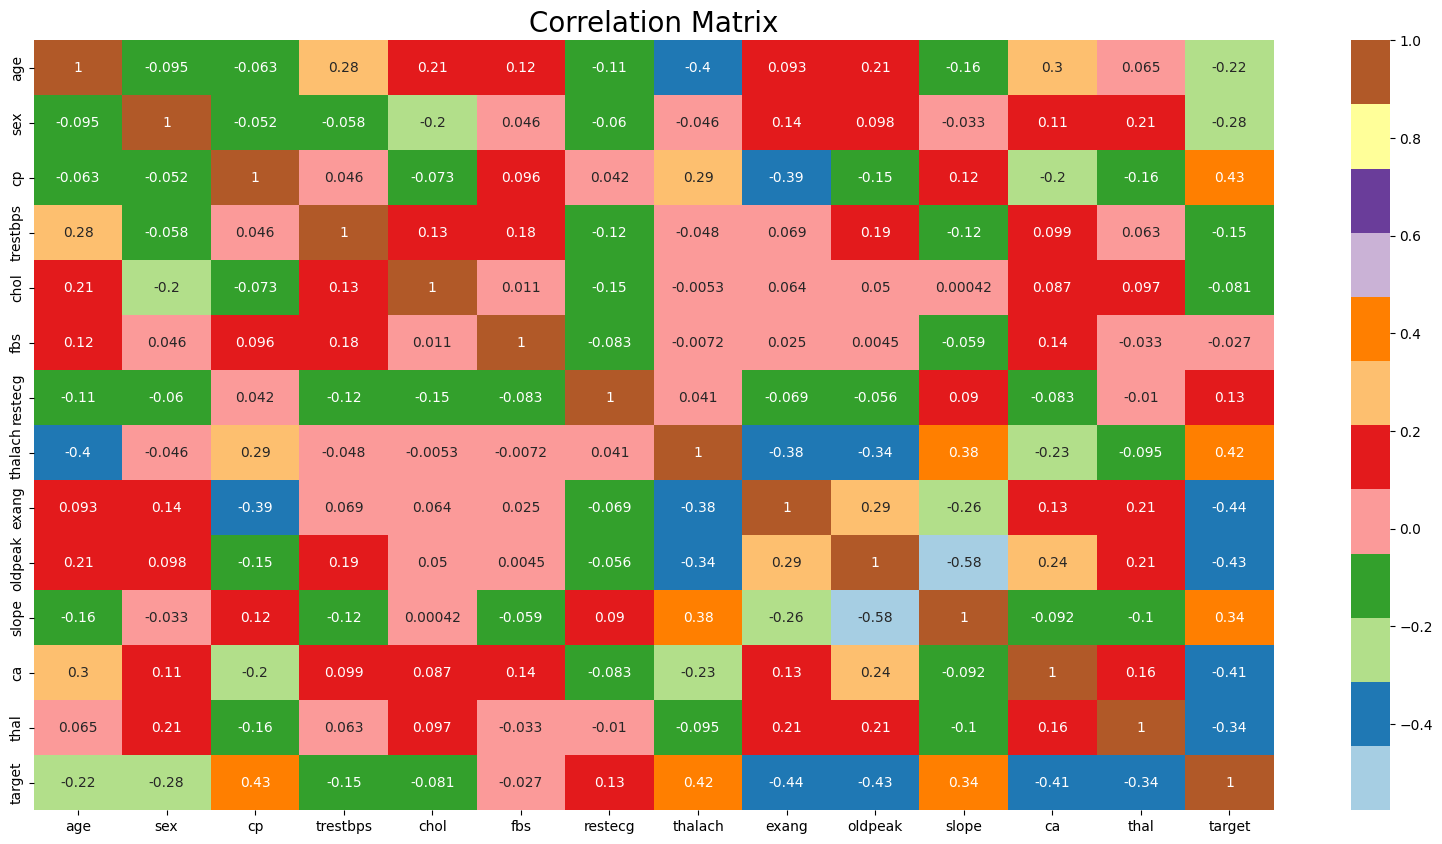

In [156]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Paired')
plt.title('Correlation Matrix',fontsize=20)
plt.show()

* cp, thalach and slope show good positive correlation with target column
* oldpeak, exang, ca, thal, age, sex show negative correlation with target column
* fbs, chol, trestbps show low correlation with target column

### To Find how many people are diagnosed with Heart Disease 

In [63]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

#### Visualizing the target column

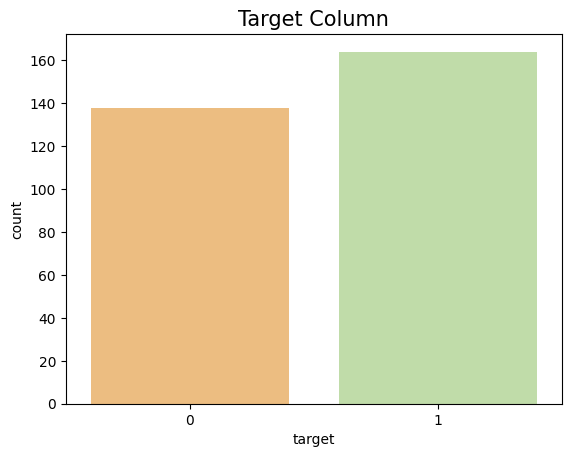

In [158]:
sns.countplot(data = df, x = 'target', palette = 'Spectral')
plt.title('Target Column',fontsize=15)
plt.show()

* 0 = No Heart Disease  & 1 = Heart Disease
* From countplot we can see half of the people suffer with heart disease

### Find The Count of Male and Female in this Dataset

In [67]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

#### Visualizing the Count of Male and Female

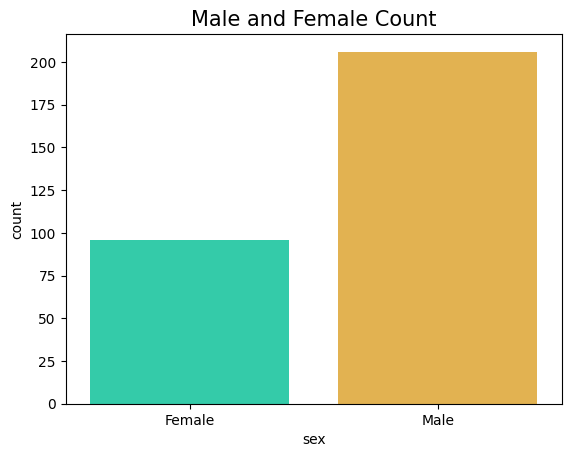

In [69]:
sns.countplot(data = df, x = 'sex', palette ='turbo')
plt.xticks([0,1],['Female','Male'])
plt.title('Male and Female Count',fontsize=15)
plt.show()

* With above countplot we can see around 30% were Female and 70% Male 

### Visualizing Heart Disease Based on Gender

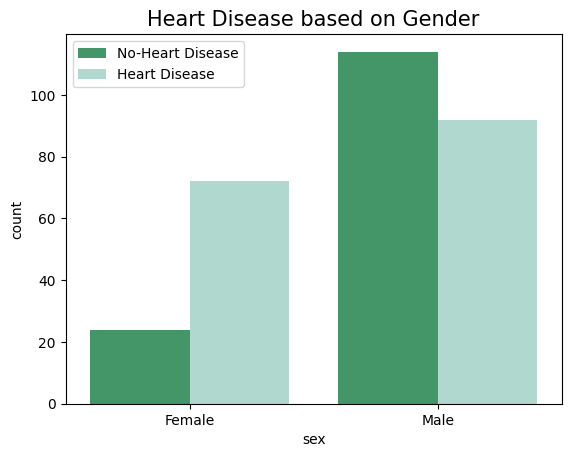

In [71]:
sns.countplot(data=df,x='sex',hue='target',palette='BuGn_r')
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Heart Disease','Heart Disease'])
plt.title('Heart Disease based on Gender',fontsize=15)
plt.show()

* From above visualization we can see Male's are more prone to Heart Disease than Female's

### Check Age Distribution in the Dataset

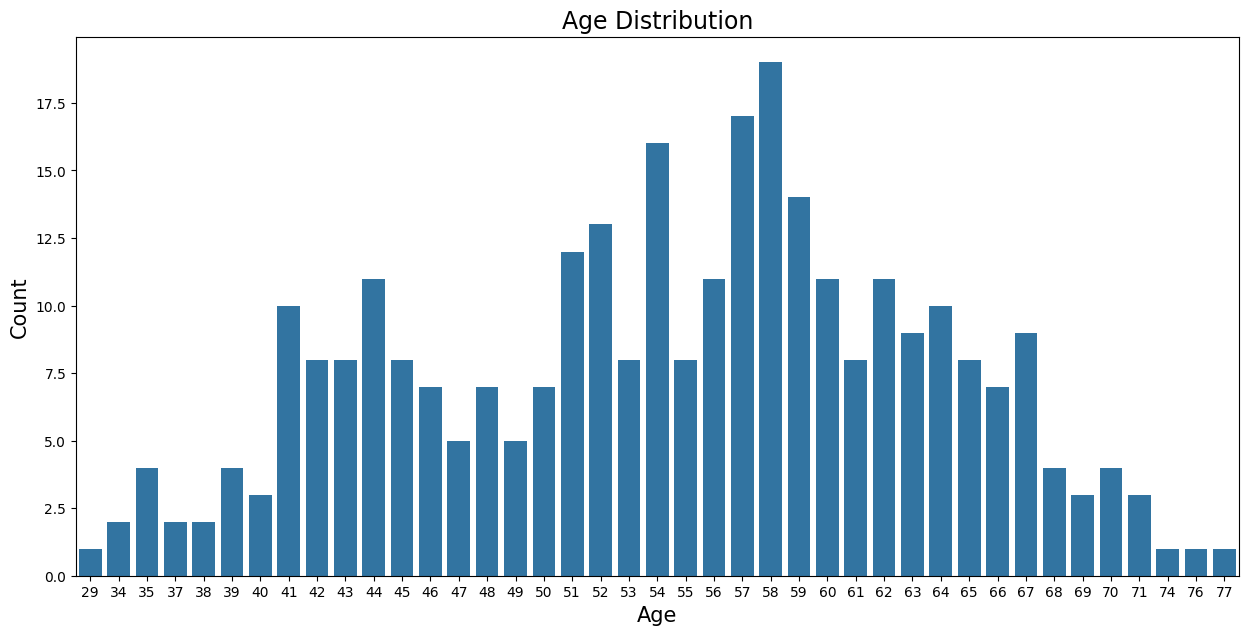

In [73]:
# Countplot Creation of Age Distribution using MatplotLib and Seaborn
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=df)
plt.title('Age Distribution', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In this section, the best analysis can be divided into the elderly,middle-aged, young people by looking at the age ranges.

In [75]:
#Statistical Analysis
Min_Age=df['age'].min()
Max_Age=df['age'].max()
Mean_Age=df['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.420529801324506


In [77]:
#Categorical Analysis
Young_Ages=df[(df['age']>=29) & (df['age']<40)]
Middle_Ages=df[(df['age']>=40) & (df['age']<55)]
Elderly_Ages=df[(df['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 15
Middle Ages = 128
Elderly Ages = 151


#### Visualizing the Age Category

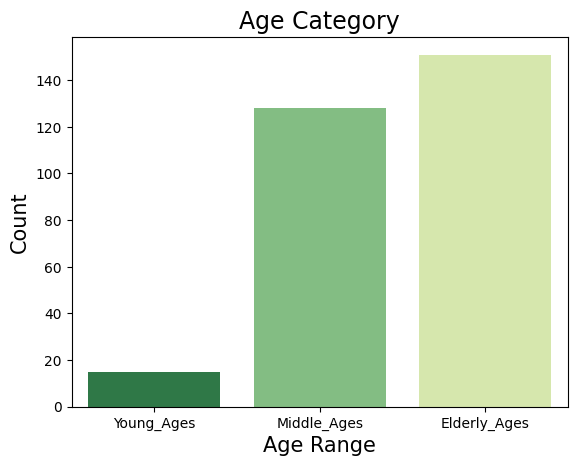

In [79]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn
sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

* With this visualization we can see Middle age groups (Age_Range = 40to55) people are most affected by Heart Disease than elderly age groups and young age groups

### Check Chest Pain Type

#### Visualizing the Chest pain type

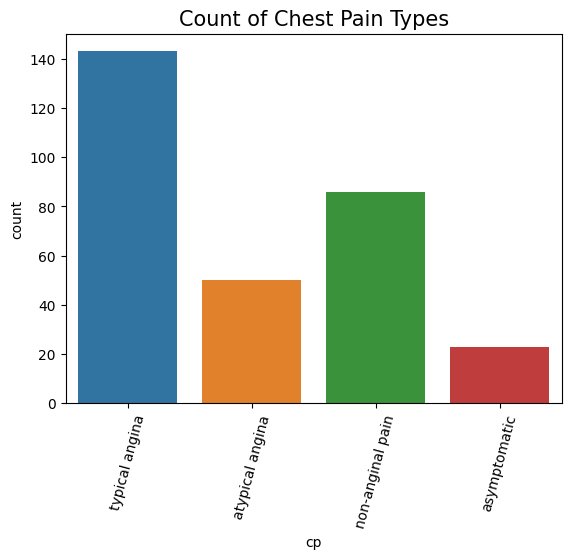

In [81]:
sns.countplot(data = df, x ='cp',palette='tab10')
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xticks(rotation=75)
plt.title('Count of Chest Pain Types',fontsize=15)
plt.show()

* Typical Angina Chest Pain Type is most common among people in this dataset

### Visualizing the chest pain distribution as per Target column

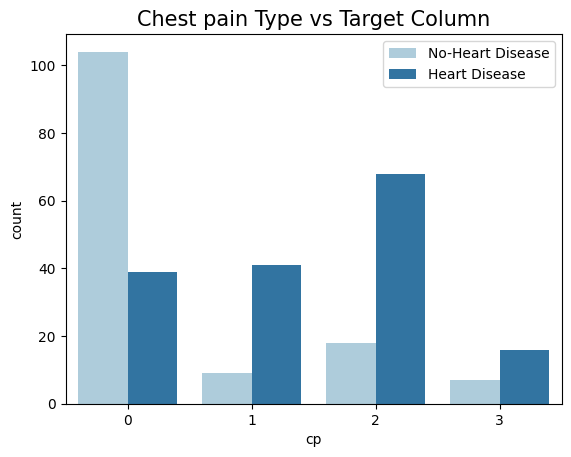

In [83]:
sns.countplot(data = df, x="cp",hue="target",palette='Paired')
plt.legend(labels=["No-Heart Disease","Heart Disease"])
plt.title('Chest pain Type vs Target Column',fontsize=15)
plt.show()

* From this plot we can see healthy people are more affected by Chest Pain. Chest Pain can be subjective due to stress, physical activities & many more & also it varies between Gender

### Visualizing Fasting Blood Sugar Distribution according to Target column

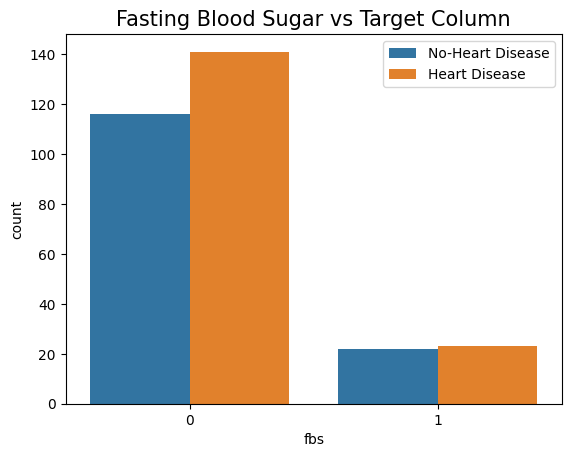

In [85]:
sns.countplot(data = df, x="fbs",hue="target")
plt.legend(labels=["No-Heart Disease","Heart Disease"])
plt.title('Fasting Blood Sugar vs Target Column',fontsize=15)
plt.show()

* fbs is considered as diabetes indicator. If fbs greater than 120 mg/dl then that person is considered as diabetic.

### Check Resting Blood Pressure Distribution

Text(0.5, 1.0, 'Resting Blood Pressure')

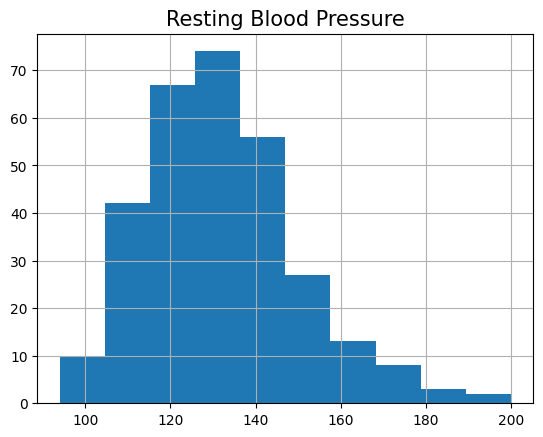

In [89]:
df['trestbps'].hist()
plt.title('Resting Blood Pressure',fontsize=15)

* From this histogram  we can see that Blood Pressure of the people in this dataset is more between 120 to 130

### Compare Resting Blood Pressure as per Sex Column

Text(0.5, 1.0, 'Resting Blood Pressure vs Sex Column')

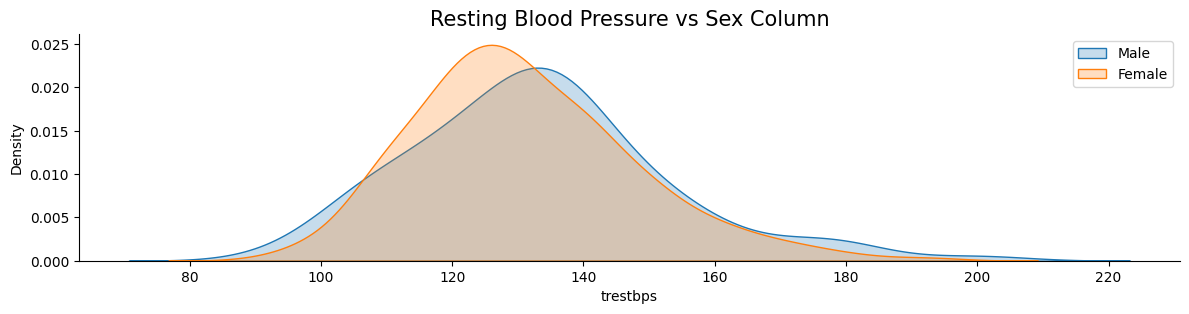

In [87]:
g = sns.FacetGrid(df,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])
plt.title('Resting Blood Pressure vs Sex Column',fontsize=15)

* From this plot we can see that women have low Blood Pressure as compared to men. For Women is around 120 while for men is little less than 140

### Show the Distribution of Serum Cholestrol

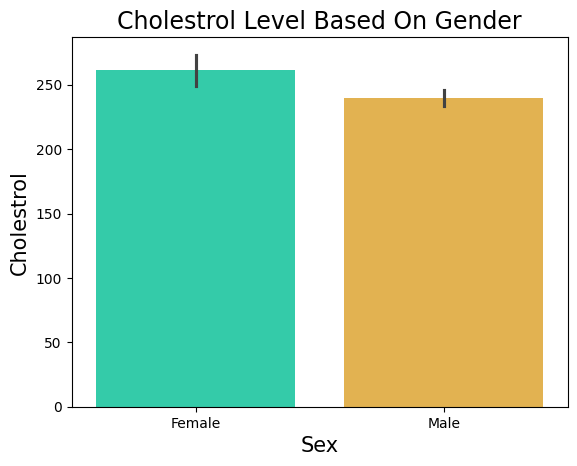

In [91]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn
sns.barplot(x='sex', y='chol', data=df, palette='turbo')
plt.xticks([1,0],['Male','Female'])
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

* Cholestrol are slightly higher in Female's than Male

### Plot Continuous Variables

In [93]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Separating Categorical and Continuous Columns

In [95]:
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)

    else:
        cont_val.append(column)

In [97]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [99]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#### Visualizing continuous variables

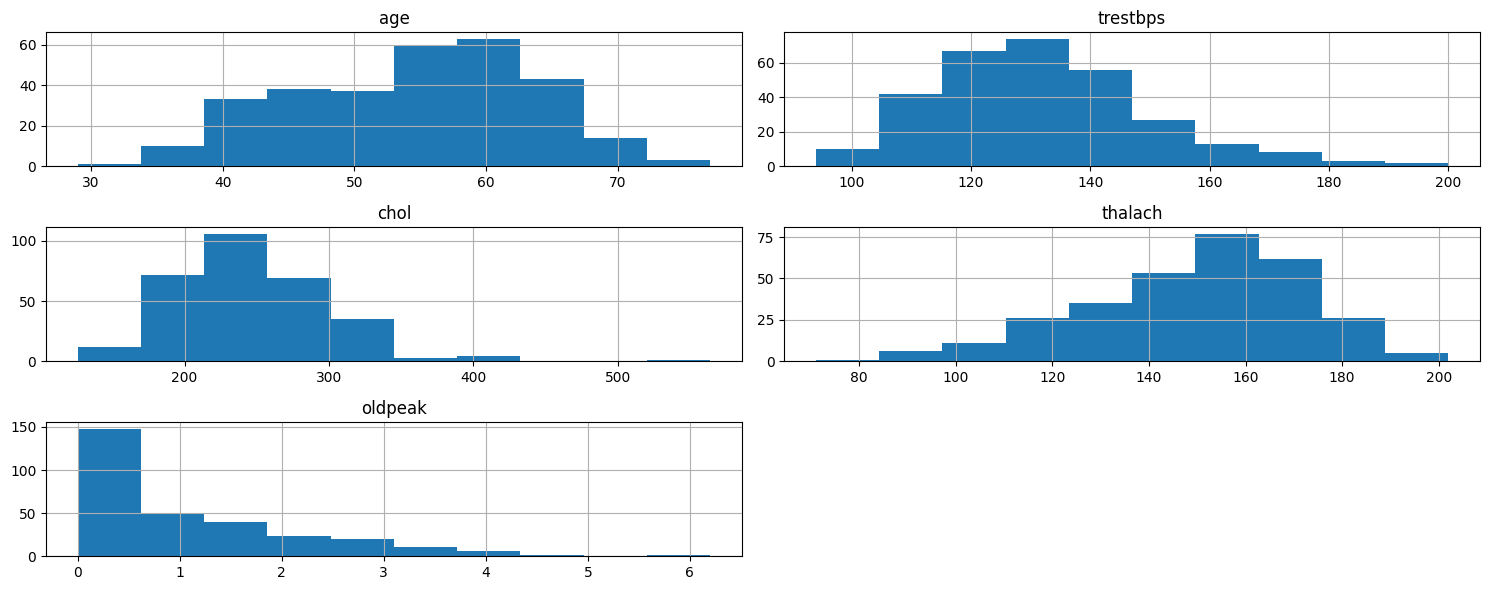

In [103]:
df.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

* Normal Distribution can be seen in Age, trestbps & almost for chol, oldpeak is positive skewed whereas thalach is negative skewed

### Defining x and y

In [105]:
x = df.drop('target',axis=1)
y = df['target']

In [107]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [109]:
y

0      0
1      0
2      0
3      0
4      0
      ..
297    1
298    1
299    0
300    0
301    0
Name: target, Length: 302, dtype: int64

### Splitting the Dataset

In [111]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [113]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
18,58,1,2,140,211,1,0,165,0,0.0,2,0,2
90,52,1,3,118,186,0,0,190,0,0.0,1,0,1
75,44,1,1,120,220,0,1,170,0,0.0,2,0,2
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3
28,55,0,0,180,327,0,2,117,1,3.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1
129,41,1,1,120,157,0,1,182,0,0.0,2,0,2
180,39,0,2,138,220,0,1,152,0,0.0,1,0,2
174,49,0,0,130,269,0,1,163,0,0.0,2,0,2


In [115]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
103,60,1,0,145,282,0,0,142,1,2.8,1,2,3
133,56,1,0,132,184,0,0,105,1,2.1,1,1,1
143,64,1,0,120,246,0,0,96,1,2.2,0,1,2
181,55,1,0,132,353,0,1,132,1,1.2,1,1,3
260,63,0,0,150,407,0,0,154,0,4.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,37,0,2,120,215,0,1,170,0,0.0,2,0,2
36,64,1,0,128,263,0,1,105,1,0.2,1,1,3
101,43,1,0,120,177,0,0,120,1,2.5,1,0,3
185,38,1,3,120,231,0,1,182,1,3.8,1,0,3


In [117]:
print('Shape of xtrain',xtrain.shape)
print('Shape of xtest',xtest.shape)

Shape of xtrain (226, 13)
Shape of xtest (76, 13)


In [119]:
print('Shape of ytrain',ytrain.shape)
print('Shape of ytest',ytest.shape)

Shape of ytrain (226,)
Shape of ytest (76,)


In [121]:
ytrain

18     1
90     1
75     1
8      0
28     0
      ..
6      0
129    1
180    1
174    1
249    1
Name: target, Length: 226, dtype: int64

In [123]:
ytest

103    0
133    0
143    0
181    0
260    0
      ..
62     1
36     1
101    0
185    0
5      1
Name: target, Length: 76, dtype: int64

### Logistic Regression Model Training

In [125]:
log_model = LogisticRegression() 
log_model.fit(xtrain,ytrain)

LogisticRegression()

### Model Evaluation

In [127]:
# Training data evaluation
ypredtrain = log_model.predict(xtrain)

Confusion_matrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion_matrix: \n',Confusion_matrix)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

Classification_report =classification_report(ytrain,ypredtrain)
print('Classification_report: \n',Classification_report)

Confusion_matrix: 
 [[ 81  22]
 [ 10 113]]
Accuracy: 0.8584070796460177
Classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       103
           1       0.84      0.92      0.88       123

    accuracy                           0.86       226
   macro avg       0.86      0.85      0.86       226
weighted avg       0.86      0.86      0.86       226



In [129]:
# Testing data evaluation
ypredtest = log_model.predict(xtest)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix: \n',Confusion_matrix)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Classification_report =classification_report(ytest,ypredtest)
print('Classification_report: \n',Classification_report)

Confusion_matrix: 
 [[27  8]
 [ 6 35]]
Accuracy: 0.8157894736842105
Classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.81      0.85      0.83        41

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



* With Model Evaluation we can see that we can build a Logistic Regression Model for Predictions of Heart Attack based on training given to the model as it gives accuracy of 86% on training dataset ie model classifies 86 datapoints correctly and 14 are misclassified datapoints. For testing dataset it gives accuracy of 82% ie model can classify 82 datapoints correctly and misclassifies 18 datapoints. As compared to other algorithms of classification Logistic Regression works well for the given dataset and there is no overfitting. 

#### Conclusion

This project provides the deep insight into machine learning techniques for classification of heart diseases. The role of classifier is crucial in healthcare industry so that the results can be used for predicting the treatment which can be provided to patients. The existing techniques are studied and compared for building a model in detecting efficiently and in effective accurate systems. Machine learning techniques significantly improves accuracy of cardiovascular risk prediction through which patients can be identified during an early stage of disease and can be benefitted by preventive treatment. It can be concluded that there is a huge scope for machine learning algorithms. With this Logistic Regression model many applications can be build that will help in predicting cardiovascular diseases and can prevent life threats.